In [55]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# inverse survival function find standard dist value
# consider a norm dist curve and 2.25% is after z value 2
stats.norm.isf(q = 0.0225)

2.004654461765096

In [57]:
# FOR 95 % confidence interval range
# consider a normal dist curve ,and 5% is remaining out from 95%
# so 5% is split on both left and right end
# so 5% =2 =2.5% each side (negative side and positive side)
stats.norm.isf(q = 0.025)

1.9599639845400545

In [58]:
# THUS THE STANDARD DEVIATION RANGE FOR CI 95% is -1.96 to +1.96

In [59]:
stats.norm.isf(q = 0.005)

2.575829303548901

In [60]:
np.random.seed(10)
t = np.random.randn(54)
t

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002])

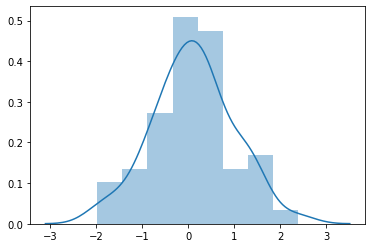

In [61]:
sns.distplot(t);

In [62]:
age_series = 24 +  (t * 3.8)

In [63]:
age_series

array([29.06002872, 26.7180601 , 18.12747889, 23.96814137, 26.3610767 ,
       21.26367487, 25.00894403, 24.4124844 , 24.01630744, 23.3365192 ,
       25.64549952, 28.57154202, 20.33275045, 27.9074415 , 24.86879449,
       25.69152293, 19.6809116 , 24.51352014, 29.64124061, 19.89674143,
       16.48463253, 17.37518528, 25.01106662, 33.06287586, 28.27002676,
       30.35596441, 24.37676702, 29.31238623, 22.96925765, 26.3301759 ,
       22.98419468, 21.91262575, 24.50429152, 22.19066034, 28.97219771,
       24.74105046, 25.52079796, 22.71699712, 28.7745946 , 21.21851589,
       26.50887989, 22.66668681, 20.43015323, 22.14051858, 20.94255366,
       23.19174897, 22.71126706, 25.18624576, 26.14758014, 23.43980302,
       23.90155972, 25.09855797, 21.94845953, 26.69100808])

In [64]:
population = np.random.randn(50000)

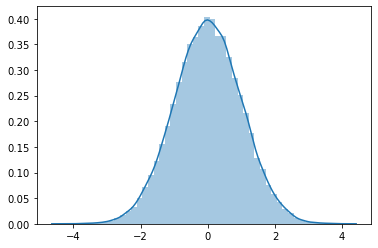

In [65]:
sns.distplot(population);

In [66]:
# avg salary of 3yrs exp data scientist = 7.8lpa, SD = 0.35lpa

In [67]:
p = (population * 0.35) + 7.68

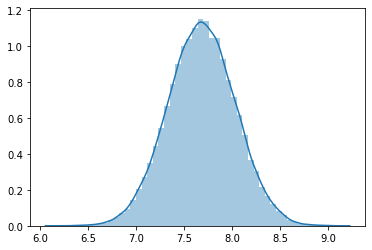

In [68]:
sns.distplot(p);

In [69]:
# PROCESS 1 - Theoretical approach
# multiple rounds of sampling
# 50 trial - 300 records each

In [70]:
trial = []
for itr in np.arange(50):
    samp = []
    for val in np.arange(300):
        samp.append(np.random.choice(p))
    trial.append(np.mean(samp))

In [71]:
np.mean(trial),np.std(trial,ddof=1)

(7.679221755115311, 0.016463618052231198)

In [72]:
# checking 95% confidence interval range(check stats day 3 notes) : -1.96 to +1.96

In [73]:
[np.mean(trial) - 1.96 * np.std(trial,ddof=1) , np.mean(trial) + 1.96 * np.std(trial,ddof=1) ]

[7.646953063732938, 7.711490446497684]

In [74]:
# INFERENCE 
# Avg estimated salary for 3yrs DS is given as 95% in 
# the confidence range of [7.646953063732938, 7.711490446497684]

In [75]:
# PROCESS 2 - Practical approach
# Here we are taking only one sample of 300 records
# OUR GOAL IS TO BRING MEAN AND STD CLOSER TO PROCESS 1(THEORETICAL APPROACH)

In [76]:
samp = []
for val in np.arange(300):
    samp.append(np.random.choice(p))

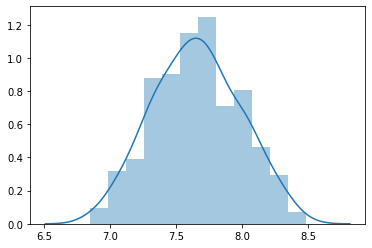

In [77]:
sns.distplot(samp);

In [78]:
np.mean(samp),np.std(samp,ddof=1) #statistical fluke

(7.653023964474899, 0.3301241680483427)

In [79]:
# standard error of mean = std / sqrt(n)
SE = np.std(samp,ddof=1) / np.sqrt(300)
SE

0.01905972772887119

In [80]:
# now SE is closer to the mean we got in theoretical approach

In [81]:
[np.mean(trial) - 1.96 * SE , np.mean(trial) + 1.96 * SE ]

[7.641864688766724, 7.716578821463898]

In [82]:
# 95% is also closerto theroretical results

In [83]:
# NOTE : In series it is advisable to use np.std(x,ddof = 1) rather than np.std(x) because
#     the former divides with n-1 which is correct whereas the latter divides with n values which is wrong
#     Even in dataframe it divides with n-1 values

In [84]:
# PRACTICAL QUESTTION :
# Courier company in New York claims that its mean time for delivery is less than 3hrs.The consumer protection
# agency decides to comduct a study to see if this claim is true. The agency randomly selects 50 deliveries 
# and determines the mean delivery time to be 2.8hrs with standard deviation of s = 0.6 hrs. 
# The agency wants to estimate the mean delivery time using a 95% CI interval . Obtain the interval 
# and then decide if the courier company's claim appears to be reasonable 

In [89]:
sample_mean = 2.8
sd = 0.6
n = 50

In [90]:
SE = sd / np.sqrt(50)

In [91]:
[sample_mean - 1.96 * SE , sample_mean + 1.96 * SE]

[2.633688485064924, 2.9663115149350756]

In [92]:
# Proportion of voters favouring Biden
# considering the voters for biden as 1 and trump as 0
p = 142 #biden
n = 250
q = 108 #trump
mean = p/n
mean

0.568

In [98]:
# 1 = biden and 0 = trump 
p_variance = (142 *(1 - mean)**2 + 108 * (0 - mean)**2) / (n-1)
p_variance

0.24636144578313254

In [100]:
p_std = np.sqrt(p_variance)
p_std

0.49634810947875335

In [102]:
# standard error of proportion
sep = p_std/np.sqrt(n)
sep

0.03139181076542941

In [103]:
# 95% CI

[mean - 1.96 * sep, mean + 1.96 * sep]

[0.5064720508997583, 0.6295279491002416]

In [104]:
# The above calculations for categorical data can be done by 
# built in functions from statsmodels.stats.proportion

In [107]:
import statsmodels.stats.proportion as smp

In [110]:
# count is the one we are focussing,here it is biden
# nobs is count
# alpha is the percentage that needs to be scaled out ...we need 95% so here it is 5% = 0.05
LCI,UCI = smp.proportion_confint(count = p, nobs = n, alpha = 0.05, method = 'normal')
[LCI,UCI]

[0.5065963584276423, 0.6294036415723576]